In [1]:
import scipy.stats as stats
import math 
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare
import pickle

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
#average number of huricanes each year

lambda_ = 6.3

#The comulative probablility of observing less than 15
comulative_prob = stats.poisson.cdf(14, lambda_)

#Probability of observing 15 or more

prob_15_or_more = 1 - comulative_prob

alpha = 0.022

#Is the result statistically significant?
is_significant = prob_15_or_more < alpha

print('The probability of observing 15 or more hurricanes in a single year are', prob_15_or_more)
print('Is this statistical significant at level 0.022: ', 'yes' if is_significant else "no" )




The probability of observing 15 or more hurricanes in a single year are 0.002217122790073134
Is this statistical significant at level 0.022:  yes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#Calculate the difference
difference = np.abs(pre-post)
mean_diff = np.mean(difference)
#Formula from the task
std_diff = np.sqrt((np.std(pre)+np.std(post))/2)

n = len(difference)

#Calculate the test statistics
t_stat = mean_diff/(std_diff * np.sqrt(2/n))

degrees_of_freedom = n-1

#Calculating the p-value
p_val = stats.t.sf(np.abs(t_stat), degrees_of_freedom) * 2 #For the two tailed test!!


print("t-stat: ", t_stat)
print("p-val: ", p_val)

#I dont know what alpha is, assuming 0.05
alpha = 0.05

is_significant = p_val > alpha

print("Is the change in blood pressure statistical significant(alpha = 0.05): ", "yes" if is_significant else "No")



t-stat:  12.985900282233308
p-val:  3.9193279921100367e-07
Is the change in blood pressure statistical significant(alpha = 0.05):  No


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

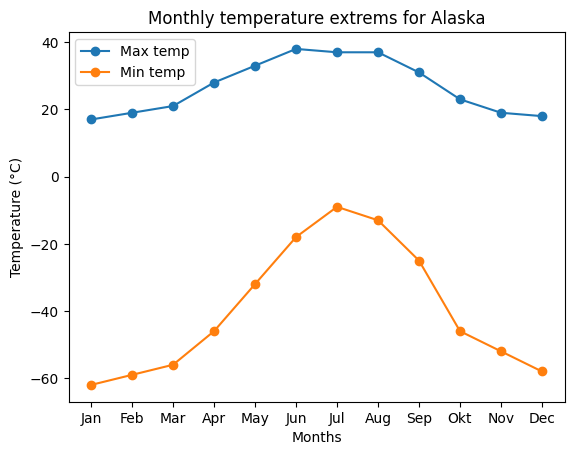

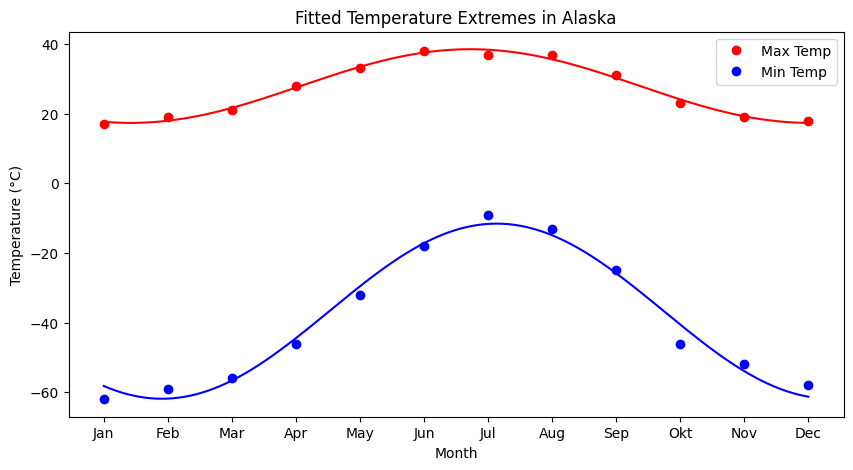

In [4]:
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
months_num = np.arange(len(months))  # This will create an array [0, 1, 2, ..., 11]


plt.plot(months, max_temp, label='Max temp', marker='o')
plt.title('Monthly temperature extrems for Alaska')
plt.plot(months, min_temp, label='Min temp', marker='o')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

def sinusoidal(x, A, B, C, D):
    return A * np.sin(B*x+C) + D

# Guesses for amplitude, frequency, phase shift, and vertical shift
initial_guess_max = [20, 2*np.pi/12, 0, 25]  # Adjust these values as needed
initial_guess_min = [30, 2*np.pi/12, 0, -30]  # Adjust these values as needed

max_temp_curve, _ = curve_fit(sinusoidal, months_num, max_temp, p0=initial_guess_max)
min_temp_curve, _ = curve_fit(sinusoidal, months_num, min_temp, p0=initial_guess_min)


days = np.linspace(0, 11, 365)

fitted_max = sinusoidal(days, *max_temp_curve)
fitted_min = sinusoidal(days, *min_temp_curve)

# Plot original data and fitted curves
plt.figure(figsize=(10, 5))
plt.plot(months, max_temp, 'ro', label='Max Temp')
plt.plot(days, fitted_max, 'r-')
plt.plot(months, min_temp, 'bo', label='Min Temp')
plt.plot(days, fitted_min, 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Fitted Temperature Extremes in Alaska')
plt.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

c:\Users\Lisa\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:828: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
c:\Users\Lisa\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:504: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
c:\Users\Lisa\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:7412: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


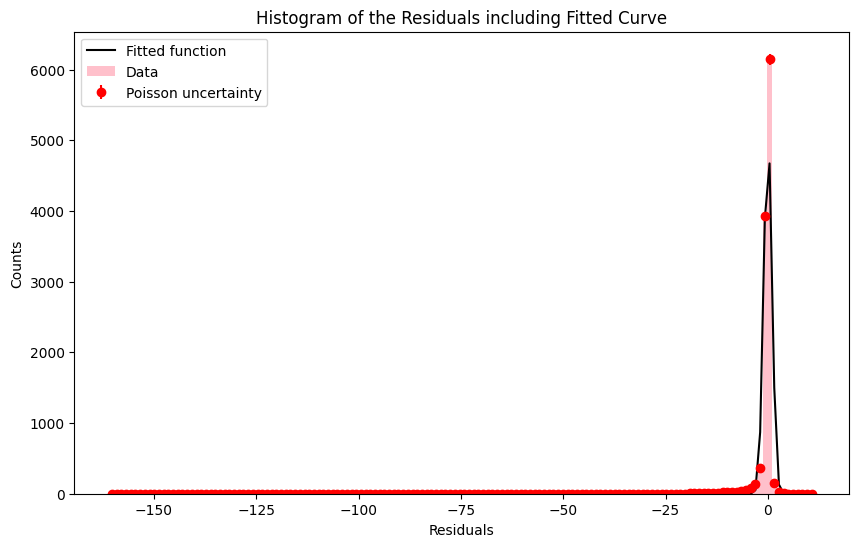

Chi-square: inf
P-value: 0.0
The fit isn't a good description of the data.


In [40]:
#Loading the file
file = 'residuals_261.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)

scalar_value = data.item()

df = pd.DataFrame(scalar_value)

residuals = df['residuals']

n_bins = 150
counts, bin_edges = np.histogram(residuals, bins=n_bins)
bin_cent = (bin_edges[:-1] + bin_edges[1:]) / 2

#Poisson uncertanties
errors = np.sqrt(counts)

#Defining a gaussian function for the fit ??
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

#Initial guesses for the gauss
initial_guesses = [max(counts), 0, 1]

#Fitting the function to the histogram data with curve_fit
params, _ = curve_fit(gaussian, bin_cent, counts, p0=initial_guesses, sigma=errors)

#Calculating the expected counts from the fitted function
exp_counts = gaussian(bin_cent, *params)

#Normalizing expected counts to match the total number of observed counts
exp_counts *= np.sum(counts) / np.sum(exp_counts)

#Filtering out bins with zero counts
non_zero_bins = counts > 0
filtered_counts = counts[non_zero_bins]
filtered_errors = errors[non_zero_bins]
filtered_bin_cent = bin_cent[non_zero_bins]
filtered_expected_counts = exp_counts[non_zero_bins]

#Performing the chi-square goodness-of-fit test
chi2, p_value = chisquare(f_obs=filtered_counts, f_exp=filtered_expected_counts)

#Plotting
plt.figure(figsize=(10, 6))
plt.bar(bin_cent, counts, width=bin_edges[1] - bin_edges[0], color='pink', label='Data')
plt.errorbar(bin_cent, counts, yerr=errors, fmt='o', color='red', label='Poisson uncertainty')
plt.plot(bin_cent, exp_counts, color='black', label='Fitted function')
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.title('Histogram of the Residuals including Fitted Curve')
plt.legend()
plt.show()

# Results
print(f"Chi-square: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The fit isn't a good description of the data.")
else:
    print("The fit is a good description of the data.")



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

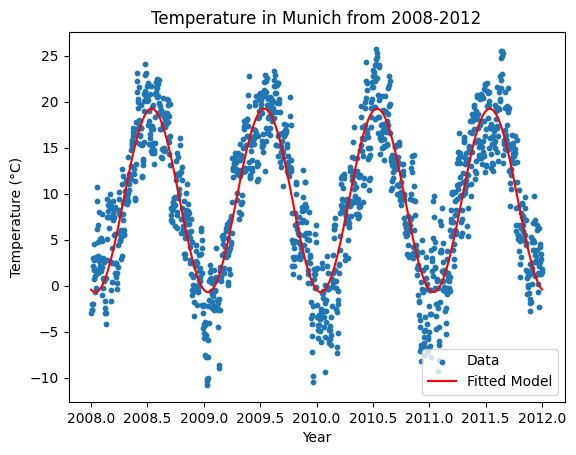

Best-fit parameters: a=-9.962034672377369, b=12.331742861926209, c=9.262821312957865
Parameter uncertainties: [0.13249838 0.01331653 0.09374718]
Average temperature, c param: 9.262821312957865°C
Typical daily average temperatures: coldest ~ 19.224855985335232°C, hottest ~ -0.6992133594195042°C


In [49]:
data = df = pd.read_csv('munich_temp.txt', sep= ' ', header=None, names = ['Year', 'Temp'] )

#Filytering the data for the years 2008 to 2012
filtered_data = data[(data['Year'] >= 2008) & (data['Year'] <= 2012)]

#Removing bad data, unrealistic temp.
filtered_data = filtered_data[filtered_data['Temp'].between(-30, 40)]  

#Defining a model, from task
def temperature_model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

#Fitting the model with curve_fit
params, covar = curve_fit(temperature_model, filtered_data['Year'], filtered_data['Temp'])
a, b, c = params

#Calculating the uncertainties of the parameters
errors = np.sqrt(np.diag(covar))

#Plotting 
plt.scatter(filtered_data['Year'], filtered_data['Temp'], label='Data', s=10)
t = np.linspace(2008, 2012, 1000)
plt.plot(t, temperature_model(t, *params), label='Fitted Model', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich from 2008-2012')
plt.legend()
plt.show()

print(f'Best-fit parameters: a={a}, b={b}, c={c}')
print(f'Parameter uncertainties: {errors}')
print(f'Average temperature, c param: {c}°C')
coldest = c - a  # Min of cos = -1
hottest = c + a  # Max of cos = 1
print(f'Typical daily average temperatures: coldest ~ {coldest}°C, hottest ~ {hottest}°C')

#The b parameter is representing the phase shift of the cosine function.
#adjusts the timing of the temp cycle, shifting the coldest and hottest days of the year.
